In [8]:
from PIL import Image,ImageTk,ImageFilter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
da=pd.read_pickle('HW3.pkl')
print("this is Q1.")
da

this is Q1.


,Lenna,Misaka,Dog,Hashimoto,AndyLau,Apple
Original,"[[[225, 137, 125], [224, 137, 130], [225, 137,...","[[[90, 184, 237], [90, 184, 237], [90, 184, 23...","[[[132, 132, 78], [132, 132, 78], [131, 131, 7...","[[[243, 244, 249], [228, 229, 234], [230, 231,...","[[[132, 130, 115], [137, 135, 120], [139, 137,...","[[[45, 31, 30], [45, 31, 30], [45, 31, 30], [4..."


this is Q2.


&lt;matplotlib.image.AxesImage at 0x61a328&gt;

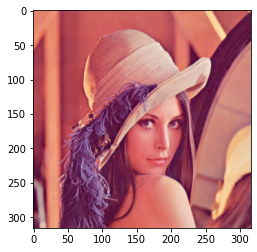

In [10]:


print("this is Q2.")
cp0=np.asarray(da['Lenna'][0],dtype=np.uint8)
cp1=np.asarray(da['Lenna'][0],dtype=np.uint8)
cp2=np.asarray(da['Lenna'][0],dtype=np.uint8)
cp3=np.asarray(da['Lenna'][0],dtype=np.uint8)
ori=Image.fromarray(cp0.astype(np.uint8))
img1=Image.fromarray(cp1.astype(np.uint8))
img2=Image.fromarray(cp2.astype(np.uint8))
img3=Image.fromarray(cp3.astype(np.uint8))
plt.imshow(ori)

this is Q3.


&lt;matplotlib.image.AxesImage at 0x18329310&gt;

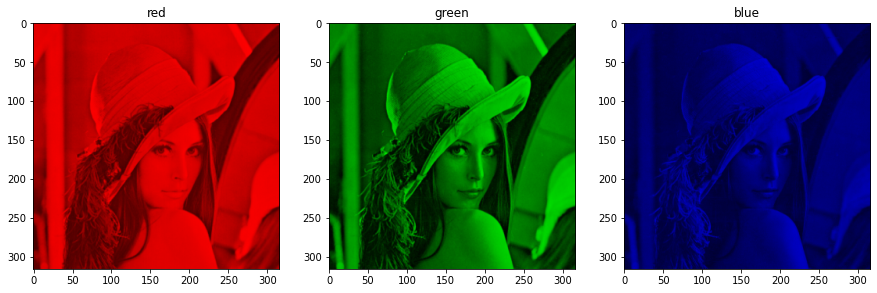

In [11]:
def fill(arr):
    re=[]
    for i in arr:
        for j in i:
            re.append(j)
    return re

print("this is Q3.")
r,g,b=ori.split()
r = np.asarray(r,dtype=np.uint8)
g = np.asarray(g,dtype=np.uint8)
b = np.asarray(b,dtype=np.uint8)

R=[(d,0,0) for d in fill(r)]
img1.putdata(R)

G=[(0,d,0) for d in fill(g)]
img2.putdata(G)

B=[(0,0,d) for d in fill(b)]
img3.putdata(B)

plt.figure(num='RGB',figsize=(15,15))
plt.subplot(1,3,1)   
plt.title('red')
plt.imshow(img1)
plt.subplot(1,3,2)   
plt.title('green')
plt.imshow(img2)
plt.subplot(1,3,3)   
plt.title('blue')
plt.imshow(img3)


In [12]:
def conv(arr,cor):
    wid,hei=len(arr),len(arr[0])
    
    x=len(cor)//2
    tmp=np.zeros((wid,hei))
    y=0
    if x%2==1:
        y=1
    
    for j in range(x,wid-x):
        for k in range(x,hei-x):
            tmp[j,k]=np.sum(np.multiply(np.mat(arr[j-x:j+x+y,k-x:k+x+y]),np.mat(cor)))
            tmp[j,k] = abs(tmp[j,k])
            if(tmp[j,k]>255):
                tmp[j,k] = 255
    return tmp


this is Q4 and Q5.


&lt;matplotlib.image.AxesImage at 0x18047eb0&gt;

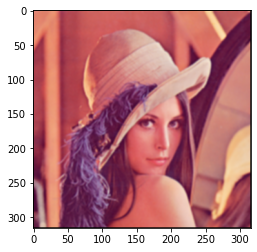

In [13]:
print("this is Q4 and Q5.")

rgb_blurry_mask=np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]])

r2=conv(r,rgb_blurry_mask)
g2=conv(g,rgb_blurry_mask)
b2=conv(b,rgb_blurry_mask)

r2=Image.fromarray(r2.astype(np.uint8))
g2=Image.fromarray(g2.astype(np.uint8))
b2=Image.fromarray(b2.astype(np.uint8))

img_re=Image.merge('RGB',[r2,g2,b2])
plt.imshow(img_re)


this is Q6.


&lt;matplotlib.image.AxesImage at 0x1800fa18&gt;

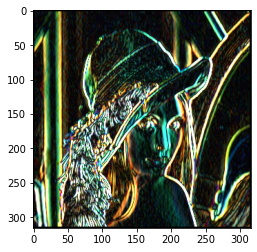

In [14]:
print("this is Q6.")

edgefinding_mask=np.array([[1,1,-1,-1],[1,1,-1,-1],[1,1,-1,-1],[1,1,-1,-1]])

r3=conv(r,edgefinding_mask)
g3=conv(g,edgefinding_mask)
b3=conv(b,edgefinding_mask)

r3=Image.fromarray(r3.astype(np.uint8))
g3=Image.fromarray(g3.astype(np.uint8))
b3=Image.fromarray(b3.astype(np.uint8))

img_edge=Image.merge('RGB',[r3,g3,b3])
plt.imshow(img_edge)
